# QPSK
**AIM**: Generation of QPSK signal and detection in baseband using Python. Plot the BER and SER curve. Examine the relationship between SER and BER.

**Transmitter**
- Generate a binary sequence of random '1's and '0's
- Split the binary sequence into odd and even sequences (In-phase and Quadrature)
- Use BPSK modulation on independent sequences
- Sum the even and odd signals at the transmitter side (even + j * odd)

**Add complex Gaussian noise at the channel**

**Receiver**
- Detect the real and imaginary parts separately
- Reshape the detected bits
- Compute BER
- Compute SER


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.special import erfc
import math as mt

pi = np.pi

In [20]:
def bpsk(signal,carrier):
    arr = []
    for i in signal:
        if i == 1:
            for j in range(100):
                arr.append(1)
        else:
            for j in range(100):
                arr.append(-1)
    return arr*carrier

QPSK Modulation


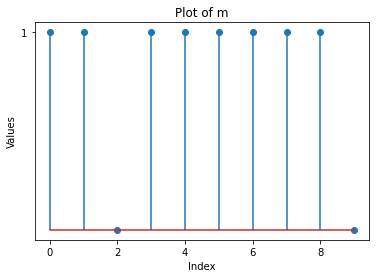

In [21]:

random.seed(0)

m_len = 20*10**4
m = [random.choice([0,1]) for i in range(m_len)]


plt.stem(m[0:10])
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of m')
plt.yticks([max(m)])  # Set the y-axis ticks to only the maximum value
plt.show()


In [22]:
random.seed(0)
#Splitting into odd and even bit streams
odd = [m[i] for i in range(m_len) if i % 2 == 0] # For odd sequencing
even = [m[i] for i in range(m_len) if i % 2 != 0] # For even sequencing



#carrier signals
fc = 2                      #carrier frequency
t = np.arange(0, 10*10**4 , 0.01)   
x1 = np.sin(2 * pi * fc * t)
x2 = np.cos(2 * pi * fc * t)
odd_bpsk = bpsk(odd,x1) #BPSK for the odd sequence
even_bpsk = bpsk(even,x2) #BPSK for the even sequence

qpsk = even_bpsk + 1j*odd_bpsk #QPSK signal



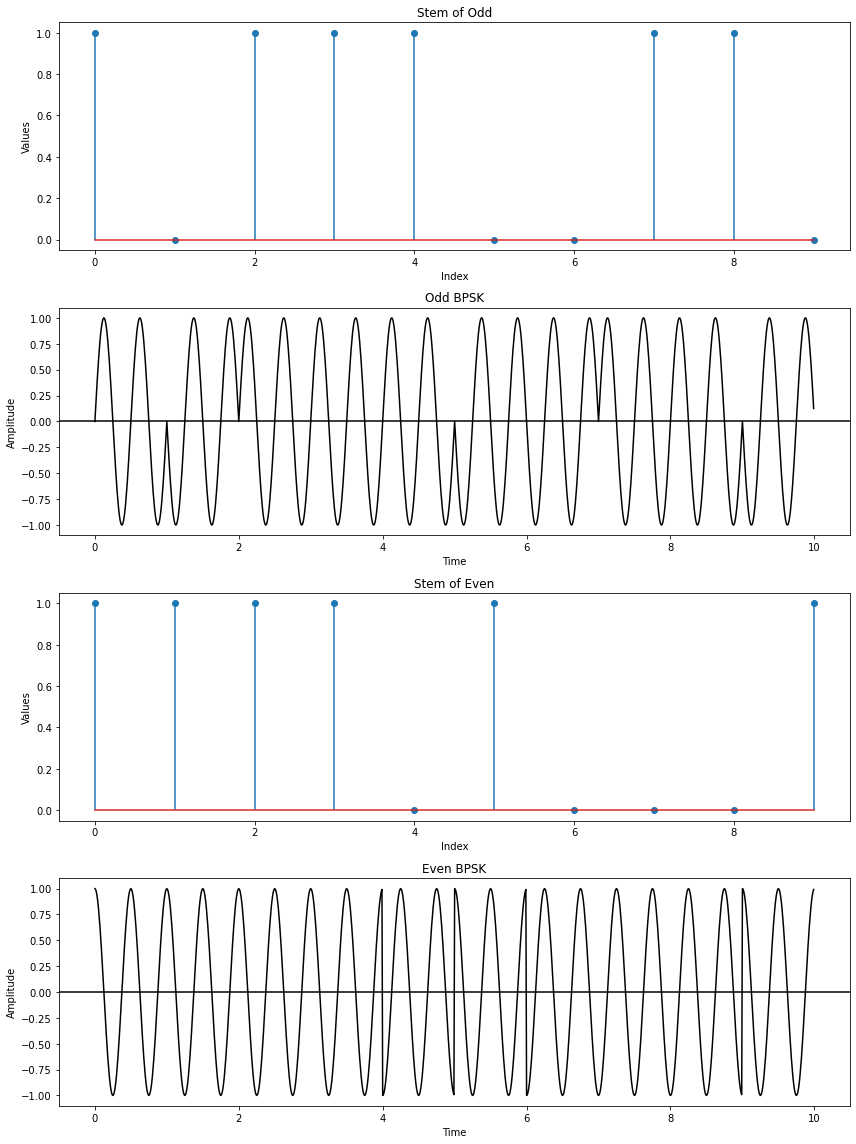

In [23]:
# Create a figure with two subplots
# Create a figure with one column and four subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 16))

# Plot stem of odd
axs[0].stem(odd[0:10])
axs[0].set_title('Stem of Odd')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')

# Plot stem of even
axs[2].stem(even[0:10])
axs[2].set_title('Stem of Even')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Values')

# Plot even BPSK
axs[3].plot(t[0:1000], even_bpsk[0:1000] , color='Black')
axs[3].set_title('Even BPSK')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Amplitude')
axs[3].axhline(0, color='black')  # Add axhline at y=0

# Plot odd BPSK
axs[1].plot(t[0:1000], odd_bpsk[0:1000] , color='Black')
axs[1].set_title('Odd BPSK')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].axhline(0, color='black')  # Add axhline at y=0


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
def demod_QPSK(signal,carrier):
    recovered = signal*carrier
    recovered = np.real(recovered)
    demod = []
    for i,j in enumerate(recovered):
        if j > 0:
            demod.append(1)
        elif j < 0:
            demod.append(0)
        else:
            if(j >recovered[i-1]):
                demod.append(1)
            else:
                demod.append(0)
    return demod

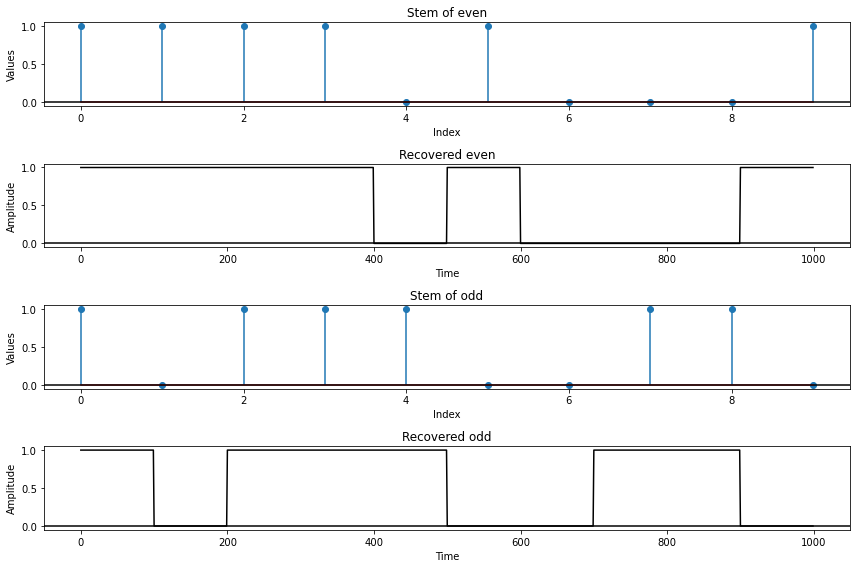

In [25]:
r_even = demod_QPSK(qpsk,x2)
r_odd = demod_QPSK(qpsk,x1*(-1j))

# Plot stem of even
fig , axs = plt.subplots(4,1,figsize=(12,8))
axs[0].stem(even[0:10])
axs[0].set_title('Stem of even')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')
axs[0].axhline(0, color='black')  # Add axhline at y=0

axs[1].plot(r_even[0:1000],color='Black')
axs[1].set_title('Recovered even')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].axhline(0, color='black')  # Add axhline at y=0

# Plot stem of odd
axs[2].stem(odd[0:10])
axs[2].set_title('Stem of odd')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Values')
axs[2].axhline(0, color='black')  # Add axhline at y=0

axs[3].plot(r_odd[0:1000],color='Black')
axs[3].set_title('Recovered odd')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Amplitude')
axs[3].axhline(0, color='black')  # Add axhline at y=0

plt.tight_layout()
plt.show()


In [8]:
# Add complex Gaussian noise at the channel
np.random.seed(42)  # Set the random seed to 42
noise = np.random.normal(0, 1, len(qpsk)) + 1j * np.random.normal(0, 2, len(qpsk))
qpsk_with_noise = qpsk + noise
noise[:5]


array([ 0.49671415-2.96408144j, -0.1382643 +0.4080012j ,
        0.64768854-0.03056969j,  1.52302986-1.8248783j ,
       -0.23415337-6.13091624j])

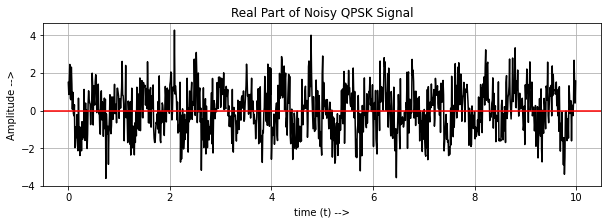

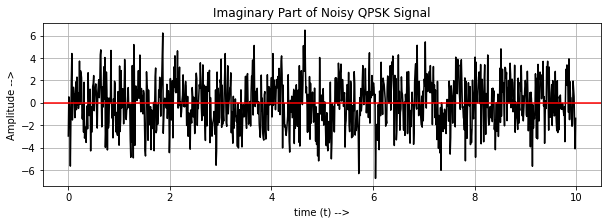

In [9]:
# Plotting the real part of the noisy QPSK signal
plt.figure(figsize=(10, 3))
plt.plot(t[0:1000], np.real(qpsk_with_noise)[0:1000], color='black')
plt.grid(True)
plt.axhline(0, color='red')
plt.title("Real Part of Noisy QPSK Signal")
plt.xlabel("time (t) -->")
plt.ylabel("Amplitude -->")
plt.show()

# Plotting the imaginary part of the noisy QPSK signal
plt.figure(figsize=(10, 3))
plt.plot(t[0:1000], np.imag(qpsk_with_noise)[0:1000], color='black')
plt.grid(True)
plt.axhline(0, color='red')
plt.title("Imaginary Part of Noisy QPSK Signal")
plt.xlabel("time (t) -->")
plt.ylabel("Amplitude -->")
plt.show()

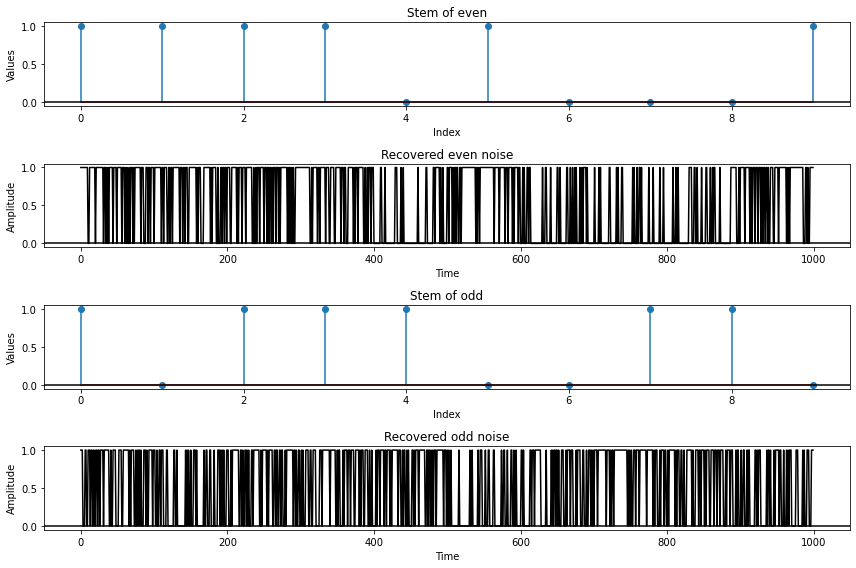

In [10]:
r_even_noise = demod_QPSK(qpsk_with_noise,x2)




r_odd_noise = demod_QPSK(qpsk_with_noise,x1*(-1j))

# Plot stem of even
fig , axs = plt.subplots(4,1,figsize=(12,8))
axs[0].stem(even[0:10])
axs[0].set_title('Stem of even')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')
axs[0].axhline(0, color='black')  # Add axhline at y=0

axs[1].plot(r_even_noise[0:1000],color='Black')
axs[1].set_title('Recovered even noise')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].axhline(0, color='black')  # Add axhline at y=0

# Plot stem of odd
axs[2].stem(odd[0:10])
axs[2].set_title('Stem of odd')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Values')
axs[2].axhline(0, color='black')  # Add axhline at y=0

axs[3].plot(r_odd_noise[0:1000],color='Black')
axs[3].set_title('Recovered odd noise')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Amplitude')
axs[3].axhline(0, color='black')  # Add axhline at y=0

plt.tight_layout()
plt.show()


In [11]:
len(r_even_noise),len(r_odd_noise),len(even),len(odd)

(10000000, 10000000, 100000, 100000)

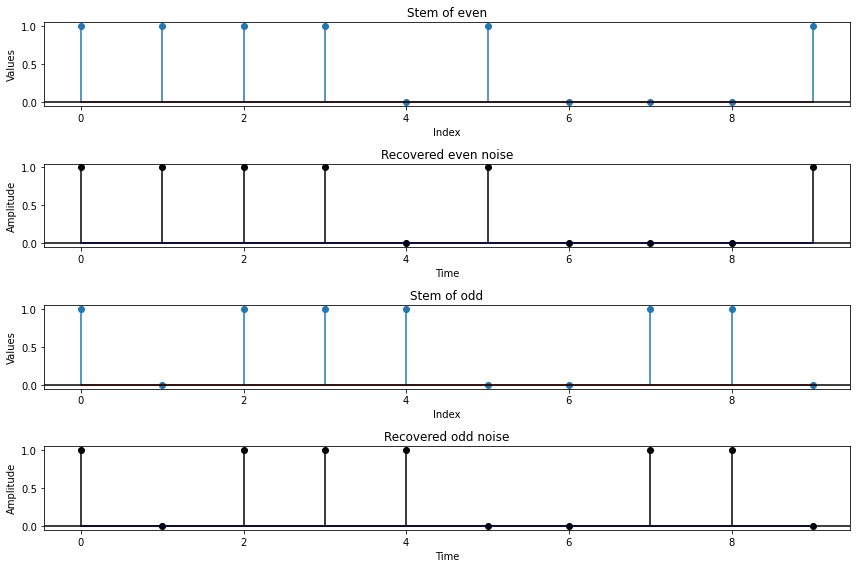

In [12]:
#Removing noise and sending Signal
def integrate_and_dump(signal):
    arr = []
    for i in range(0,len(signal),100):
        sum = np.sum(signal[i:i+100])
        if sum > 50:
            arr.append(1)
        else:
            arr.append(0)
    return arr  
re = integrate_and_dump(r_even_noise)
ro = integrate_and_dump(r_odd_noise)


fig , axs = plt.subplots(4,1,figsize=(12,8))
axs[0].stem(even[0:10])
axs[0].set_title('Stem of even')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')
axs[0].axhline(0, color='black')  # Add axhline at y=0

axs[1].stem(re[0:10] , linefmt='k', markerfmt='ko', basefmt='b-')
axs[1].set_title('Recovered even noise')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].axhline(0, color='black')  # Add axhline at y=0

# Plot stem of odd
axs[2].stem(odd[0:10])
axs[2].set_title('Stem of odd')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Values')
axs[2].axhline(0, color='black')  # Add axhline at y=0

axs[3].stem(ro[0:10] , linefmt='k', markerfmt='ko', basefmt='b-')
axs[3].set_title('Recovered odd noise')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Amplitude')
axs[3].axhline(0, color='black')  # Add axhline at y=0

plt.tight_layout()
plt.show()


In [13]:
# BER Calculation
def ER(original, received):
    error = 0
    for i in range(len(original)):
        if original[i] != received[i]:
            error += 1
    return error / len(original)

ber_even = ER(even, re)
ber_odd = ER(odd, ro)

In [14]:
# The BIT Error Rate for the even and odd sequences
ber_even,ber_odd

(0.0, 0.00604)

In [15]:
new_m = []
for i in range(len(re)):
    new_m.append(re[i])
    new_m.append(ro[i])

In [16]:
# Taking two Bits at a time as a symbol in the message signal
def symbol_signal(m):
    sym = []
    for i in range(0,len(m),2):
        if m[i] == 1 and m[i+1] == 1:
            sym.append(1)
        elif m[i] == 0 and m[i+1] == 1:
            sym.append(3)
        elif m[i] == 0 and m[i+1] == 0:
            sym.append(2)
        else:
            sym.append(4)
    return sym
original = symbol_signal(m)
received = symbol_signal(new_m)
len(original),len(received)


(100000, 100000)

In [17]:
SER = ER(original, received)
SER

0.50333

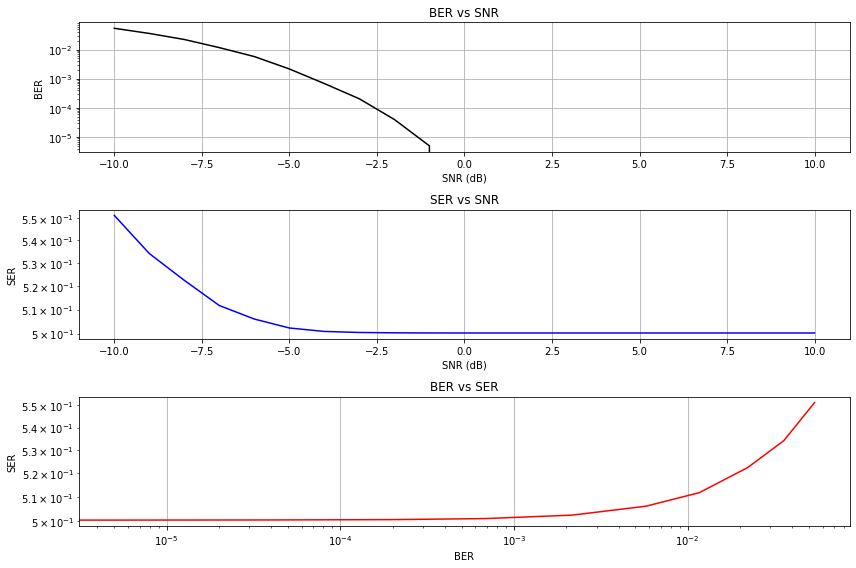

In [18]:
# SNR vs BER and SER

snr_db = np.arange(-10, 11, 1)
snr = 10 ** (snr_db / 10)
ber = []
ser = []

for i in snr:
    noise = np.random.normal(0, 1 / np.sqrt(i), len(qpsk)) + 1j * np.random.normal(0, 1 / np.sqrt(i), len(qpsk))
    qpsk_with_noise = qpsk + noise
    r_even_noise = demod_QPSK(qpsk_with_noise, x2)
    r_odd_noise = demod_QPSK(qpsk_with_noise, x1 * (-1j))
    re = integrate_and_dump(r_even_noise)
    ro = integrate_and_dump(r_odd_noise)
    ber_even = ER(even, re)
    ber_odd = ER(odd, ro)
    ber.append((ber_even + ber_odd) / 2)
    new_m = []
    for j in range(len(re)):
        new_m.append(re[j])
        new_m.append(ro[j])
    received = symbol_signal(new_m)
    ser.append(ER(original, received))

# Plot BER vs SNR
fig, axs = plt.subplots(3, 1, figsize=(12, 8))
axs[0].plot(snr_db, ber, color='black')
axs[0].set_title('BER vs SNR')
axs[0].set_xlabel('SNR (dB)')
axs[0].set_ylabel('BER')
axs[0].set_xscale('linear')
axs[0].set_yscale('log')
axs[0].grid(True)

# Plot SER vs SNR
axs[1].plot(snr_db, ser, color='blue')
axs[1].set_title('SER vs SNR')
axs[1].set_xlabel('SNR (dB)')
axs[1].set_ylabel('SER')
axs[1].set_xscale('linear')
axs[1].set_yscale('log')
axs[1].grid(True)

# Plot BER vs SER
axs[2].plot(ber, ser, color='red')
axs[2].set_title('BER vs SER')
axs[2].set_xlabel('BER')
axs[2].set_ylabel('SER')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].grid(True)

plt.tight_layout()
plt.show()
